In [2]:
# Import packages
import scanpy as sc

In [3]:
# Variables
file = "../data/BCB/raw.h5ad"

In [4]:
# Read data
ds = sc.read(file)

In [5]:
ds

AnnData object with n_obs × n_vars = 342470 × 36601
    obs: 'sample_id'
    var: 'gene_ids', 'feature_types', 'genome'

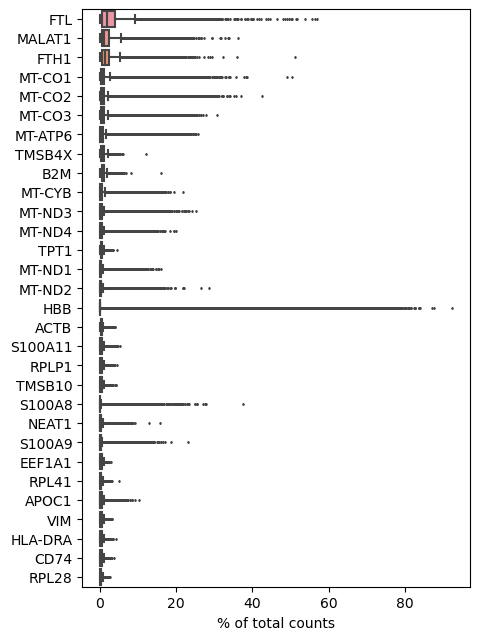

In [10]:
# Quality control plots
sc.pl.highest_expr_genes(ds)

NameError: name 'ds' is not defined